## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# import  IPython.display as dp
# with open('README.md','r+', encoding='utf-8') as f:
#     dp.display(dp.Markdown(f.read()))

> ### Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

In [2]:
# Your code here - remember to use markdown cells for comments as well!
# !pip install -U fsds
from fsds.imports import *


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


fsds v0.2.9 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


In [3]:
import os,glob
display(os.listdir('zippedData'))


['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [4]:
files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [5]:
files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [6]:
os.path.split(files[0])[-1].replace('.csv.gz','')

'imdb.title.crew'

In [7]:
DATA = {}
for file in files:
    print(file)
    key = os.path.split(file)[-1].replace('.csv.gz','').replace('tsv.gz','')
    if ".tsv" in file:
        sep='\t'
        encode = 'latin-1'#'utf-8'
    else:
        sep=','
        encode='utf-8'
    DATA[key] = pd.read_csv(file,sep=sep,encoding=encode)#,index_col=0)

zippedData/imdb.title.crew.csv.gz
zippedData/tmdb.movies.csv.gz
zippedData/imdb.title.akas.csv.gz
zippedData/imdb.title.ratings.csv.gz
zippedData/imdb.name.basics.csv.gz
zippedData/rt.reviews.tsv.gz
zippedData/imdb.title.basics.csv.gz
zippedData/rt.movie_info.tsv.gz
zippedData/tn.movie_budgets.csv.gz
zippedData/bom.movie_gross.csv.gz
zippedData/imdb.title.principals.csv.gz


# Preview Data

## Questions

- **Where are the gross box office numbers?**
    - rt.movie_info.
        - Key: ?
        
    - tn.movie_budgets
        - Key:
        
    - bom.movie_gross
        - Key: 
        
- **What website is that table from?**
    - What other tables are from the same source and can be joined easily?

- **What columns may require extensive pre-processing?**
    - Any Genre columns
        - `rt.movie.info.['genre']`

In [8]:
for tablename, data in DATA.items():
#     print('---'*20+'\n'+f"{tablename}:")
    try:
        display(data.head(2).style.set_caption(f"{tablename}"))
        print(len(data))
    except:
        display(data.head(2).reset_index().style.set_caption(f"{tablename}"))
    print()

146144



26517



331703



73856



606648



54432



146144



1560



5782



3387



1028186



## New Attempt (06/02)

- [ ] 'imdb.title.crew.csv.gz',
- [ ] 'tmdb.movies.csv.gz',
- [ ] 'imdb.title.akas.csv.gz',
- [ ] 'imdb.title.ratings.csv.gz',
- [ ] 'imdb.name.basics.csv.gz',
- [ ] 'rt.reviews.tsv.gz',
- [x] 'imdb.title.basics.csv.gz',
- [ ] 'rt.movie_info.tsv.gz',
- [x] 'tn.movie_budgets.csv.gz',
- [ ] 'bom.movie_gross.csv.gz',
- [ ] 'imdb.title.principals.csv.gz']

### Using imdb.title.basics & imdb.title.ratings


In [9]:
# df0 = DATA['imdb.']

#### Prepping imdb.title.basics

In [10]:
df1 = DATA['imdb.title.basics'].copy()
display(df1.head(),df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

None

In [11]:
df1.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [12]:
df1[df1['runtime_minutes'].isna()]

tconst                                      primary_title  \
3       tt0069204                                    Sabse Bada Sukh   
6       tt0112502                                            Bigfoot   
8       tt0139613                                         O Silêncio   
16      tt0187902  How Huang Fei-hong Rescued the Orphan from the...   
21      tt0250404                                          Godfather   
...           ...                                                ...   
146131  tt9915790                                    Bobbyr Bondhura   
146138  tt9916428                                The Secret of China   
146140  tt9916622        Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                                    Dankyavar Danka   
146143  tt9916754                     Chico Albuquerque - Revelações   

                                           original_title  start_year  \
3                                         Sabse Bada Sukh        2018   
6                                                 Bigfoot        2017   
8                                              O Silêncio        2012   
16      How Huang Fei-hong Rescued the Orphan from the...        2011   
21                                              Godfather        2012   
...                                                   ...         ...   
146131                                    Bobbyr Bondhura        2019   
146138                                The Secret of China        2019   
146140        Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141                                    Dankyavar Danka        2013   
146143                     Chico Albuquerque - Revelações        2013   

        runtime_minutes                 genres  
3                   NaN           Comedy,Drama  
6                   NaN        Horror,Thriller  
8                   NaN    Documentary,History  
16                  NaN                    NaN  
21                  NaN            Crime,Drama  
...                 ...                    ...  
146131              NaN                 Family  
146138              NaN  Adventure,History,War  
146140              NaN            Documentary  
146141              NaN                 Comedy  
146143              NaN            Documentary  

[31739 rows x 6 columns]

In [13]:
df1.dropna(subset=['runtime_minutes'],inplace=True)
df1.isna().sum()

tconst                0
primary_title         0
original_title        4
start_year            0
runtime_minutes       0
genres             2172
dtype: int64

In [14]:
df1[df1['genres'].isna()]

tconst                                      primary_title  \
22      tt0253093                                       Gangavataran   
35      tt0306058                                      Second Coming   
40      tt0326592                                      The Overnight   
45      tt0330987                            Tiden är en dröm, del 2   
398     tt0877604                                        Chûshingura   
...           ...                                                ...   
146086  tt9906844               Footloose in England's Lake District   
146087  tt9907032  Footloose in London II: 2 Undiscovered and Unu...   
146088  tt9907396                Footloose in the Cotswolds - Part 1   
146089  tt9907608                Footloose in the Cotswolds - Part 2   
146142  tt9916730                                             6 Gunn   

                                           original_title  start_year  \
22                                           Gangavataran        2018   
35                                          Second Coming        2012   
40                                          The Overnight        2010   
45                                Tiden är en dröm, del 2        2014   
398                                           Chûshingura        2016   
...                                                   ...         ...   
146086               Footloose in England's Lake District        2017   
146087  Footloose in London II: 2 Undiscovered and Unu...        2018   
146088                Footloose in the Cotswolds - Part 1        2016   
146089                Footloose in the Cotswolds - Part 2        2016   
146142                                             6 Gunn        2017   

        runtime_minutes genres  
22                134.0    NaN  
35                 95.0    NaN  
40                 88.0    NaN  
45                109.0    NaN  
398                76.0    NaN  
...                 ...    ...  
146086            150.0    NaN  
146087            124.0    NaN  
146088            118.0    NaN  
146089            102.0    NaN  
146142            116.0    NaN  

[2172 rows x 6 columns]

In [15]:
df1['genres'].fillna('MISSING',inplace=True)

In [16]:
print(df1.isna().sum())
df1.dropna(inplace=True)
print(df1.isna().sum())

tconst             0
primary_title      0
original_title     4
start_year         0
runtime_minutes    0
genres             0
dtype: int64
tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114401 entries, 0 to 146142
Data columns (total 6 columns):
tconst             114401 non-null object
primary_title      114401 non-null object
original_title     114401 non-null object
start_year         114401 non-null int64
runtime_minutes    114401 non-null float64
genres             114401 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.1+ MB


In [18]:
## Getting only 2010-2020 movies
df1 = df1[(df1['start_year'] >= 2010) & (df1['start_year'] <2021)]
df1

tconst                                      primary_title  \
0       tt0063540                                          Sunghursh   
1       tt0066787                    One Day Before the Rainy Season   
2       tt0069049                         The Other Side of the Wind   
4       tt0100275                           The Wandering Soap Opera   
5       tt0111414                                        A Thin Life   
...           ...                                                ...   
146135  tt9916170                                      The Rehearsal   
146136  tt9916186  Illenau - die Geschichte einer ehemaligen Heil...   
146137  tt9916190                                          Safeguard   
146139  tt9916538                                Kuambil Lagi Hatiku   
146142  tt9916730                                             6 Gunn   

                                           original_title  start_year  \
0                                               Sunghursh        2013   
1                                         Ashad Ka Ek Din        2019   
2                              The Other Side of the Wind        2018   
4                                   La Telenovela Errante        2017   
5                                             A Thin Life        2018   
...                                                   ...         ...   
146135                                           O Ensaio        2019   
146136  Illenau - die Geschichte einer ehemaligen Heil...        2017   
146137                                          Safeguard        2019   
146139                                Kuambil Lagi Hatiku        2019   
146142                                             6 Gunn        2017   

        runtime_minutes                genres  
0                 175.0    Action,Crime,Drama  
1                 114.0       Biography,Drama  
2                 122.0                 Drama  
4                  80.0  Comedy,Drama,Fantasy  
5                  75.0                Comedy  
...                 ...                   ...  
146135             51.0                 Drama  
146136             84.0           Documentary  
146137             90.0        Drama,Thriller  
146139            123.0                 Drama  
146142            116.0               MISSING  

[114394 rows x 6 columns]

#### Prepping imdb.title.ratings

In [19]:
df2 = DATA['imdb.title.ratings']

display(df2.head(),df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21

None

In [20]:
display(df1.isna().sum(),df2.isna().sum())
display(df1.nunique(),df2.nunique())

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

tconst           0
averagerating    0
numvotes         0
dtype: int64

tconst             114394
primary_title      107449
original_title     108908
start_year             11
runtime_minutes       367
genres               1041
dtype: int64

tconst           73856
averagerating       91
numvotes          7349
dtype: int64

## CHOICE: inner vs left

In [21]:
df = pd.merge(df1,df2,on='tconst',how='inner')
df

tconst                    primary_title              original_title  \
0      tt0063540                        Sunghursh                   Sunghursh   
1      tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2      tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3      tt0100275         The Wandering Soap Opera       La Telenovela Errante   
4      tt0137204                  Joe Finds Grace             Joe Finds Grace   
...          ...                              ...                         ...   
66231  tt9911774        Padmavyuhathile Abhimanyu   Padmavyuhathile Abhimanyu   
66232  tt9913056                     Swarm Season                Swarm Season   
66233  tt9913084                 Diabolik sono io            Diabolik sono io   
66234  tt9914286                Sokagin Çocuklari           Sokagin Çocuklari   
66235  tt9916160                       Drømmeland                  Drømmeland   

       start_year  runtime_minutes                      genres  averagerating  \
0            2013            175.0          Action,Crime,Drama            7.0   
1            2019            114.0             Biography,Drama            7.2   
2            2018            122.0                       Drama            6.9   
3            2017             80.0        Comedy,Drama,Fantasy            6.5   
4            2017             83.0  Adventure,Animation,Comedy            8.1   
...           ...              ...                         ...            ...   
66231        2019            130.0                       Drama            8.4   
66232        2019             86.0                 Documentary            6.2   
66233        2019             75.0                 Documentary            6.2   
66234        2019             98.0                Drama,Family            8.7   
66235        2019             72.0                 Documentary            6.5   

       numvotes  
0            77  
1            43  
2          4517  
3           119  
4           263  
...         ...  
66231       365  
66232         5  
66233         6  
66234       136  
66235        11  

[66236 rows x 8 columns]

In [22]:
df.isna().sum()/len(df)

tconst             0.0
primary_title      0.0
original_title     0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
averagerating      0.0
numvotes           0.0
dtype: float64

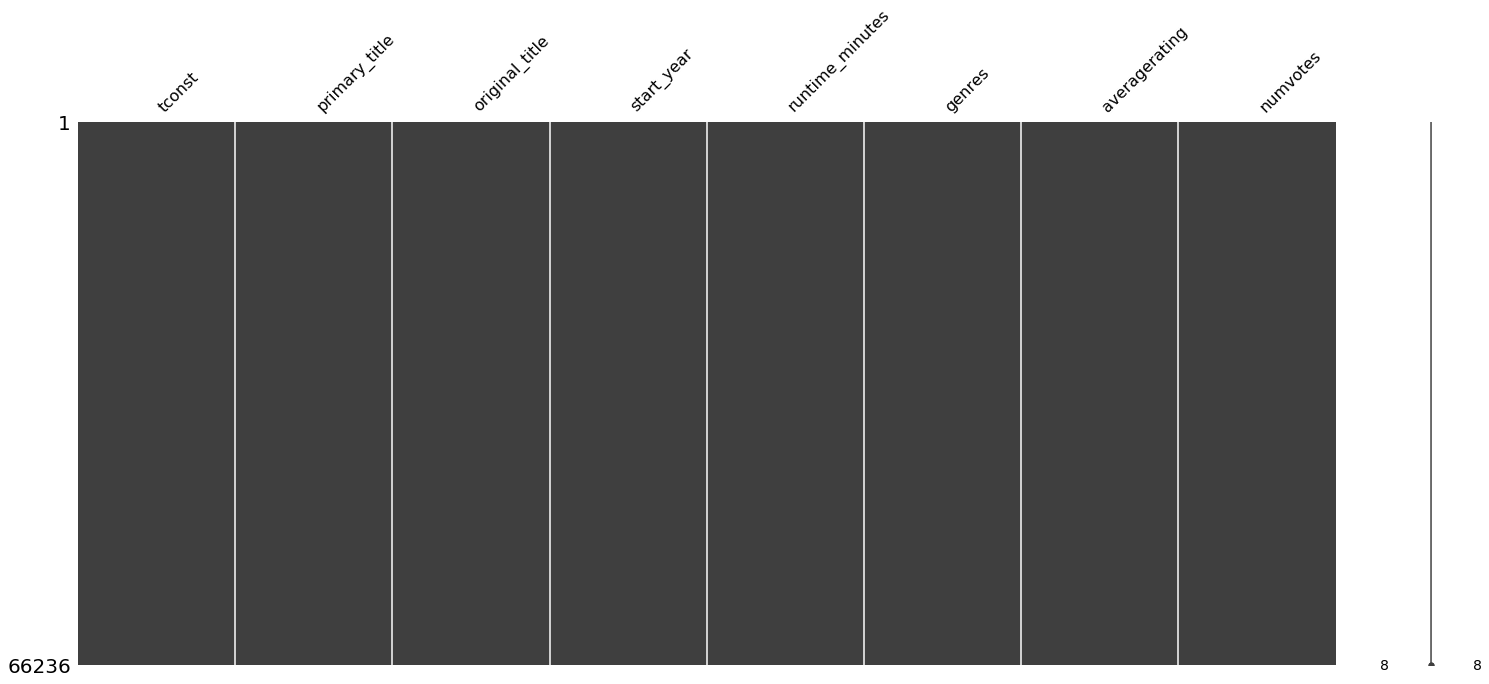

In [23]:
import missingno as ms
ms.matrix(df)

In [24]:
df[df['averagerating'].isna()]

Empty DataFrame
Columns: [tconst, primary_title, original_title, start_year, runtime_minutes, genres, averagerating, numvotes]
Index: []

In [25]:
df.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
4  tt0137204                  Joe Finds Grace             Joe Finds Grace   

   start_year  runtime_minutes                      genres  averagerating  \
0        2013            175.0          Action,Crime,Drama            7.0   
1        2019            114.0             Biography,Drama            7.2   
2        2018            122.0                       Drama            6.9   
3        2017             80.0        Comedy,Drama,Fantasy            6.5   
4        2017             83.0  Adventure,Animation,Comedy            8.1   

   numvotes  
0        77  
1        43  
2      4517  
3       119  
4       263

In [26]:
df[df.duplicated(subset=['tconst'],keep=False)]

Empty DataFrame
Columns: [tconst, primary_title, original_title, start_year, runtime_minutes, genres, averagerating, numvotes]
Index: []

### Must deal with duplicates later

In [27]:
df[df.duplicated(subset=['primary_title'],keep=False)].sort_values('primary_title')

tconst primary_title                 original_title  start_year  \
11267  tt1859618             1                              1        2019   
23741  tt2518788             1                              1        2013   
24451  tt2579680     100% Love                      100% Love        2012   
11486  tt1869226     100% Love                      100% Love        2011   
13377  tt1979163           180                            180        2011   
...          ...           ...                            ...         ...   
36187  tt3763866          Zoom                           Zoom        2015   
30710  tt3229936        Zurich  Und morgen mittag bin ich tot        2013   
31022  tt3257638        Zurich                         Zurich        2015   
21201  tt2362758          Éden                           Éden        2013   
13103  tt1961689          Éden                           Éden        2011   

       runtime_minutes                     genres  averagerating  numvotes  
11267            100.0                      Drama            9.2        13  
23741            112.0  Documentary,History,Sport            8.0      3452  
24451            166.0       Comedy,Drama,Romance            6.0       296  
11486            141.0       Comedy,Drama,Romance            7.0      2331  
13377            107.0               Comedy,Drama            7.4        42  
...                ...                        ...            ...       ...  
36187             96.0     Animation,Comedy,Drama            6.1      2323  
30710            103.0                      Drama            7.2       214  
31022             89.0                      Drama            6.0       385  
21201             73.0                      Drama            6.1        50  
13103             64.0                Documentary            7.1         8  

[5725 rows x 8 columns]

### Figure out how to join with budgets/revenue

- either tn.movie_budgets or bom.movie_gross

In [28]:
display(DATA['tn.movie_budgets'].head(),DATA['bom.movie_gross'].head())

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [29]:
df3 = DATA['tn.movie_budgets'].copy()
df3

id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,875  $1,045,663,875  
2         $350,000,000    $42,762,350    $149,762,350  
3         $330,600,000   $459,005,868  $1,403,013,963  
4         $317,000,000   $620,181,382  $1,316,721,747  
...                ...            ...             ...  
5777            $7,000             $0              $0  
5778            $6,000        $48,482        $240,495  
5779            $5,000         $1,338          $1,338  
5780            $1,400             $0              $0  
5781            $1,100       $181,041        $181,041  

[5782 rows x 6 columns]

In [30]:
df3.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [31]:
df3['release_date'] = pd.to_datetime(df3['release_date'])
df3

id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,875  $1,045,663,875  
2         $350,000,000    $42,762,350    $149,762,350  
3         $330,600,000   $459,005,868  $1,403,013,963  
4         $317,000,000   $620,181,382  $1,316,721,747  
...                ...            ...             ...  
5777            $7,000             $0              $0  
5778            $6,000        $48,482        $240,495  
5779            $5,000         $1,338          $1,338  
5780            $1,400             $0              $0  
5781            $1,100       $181,041        $181,041  

[5782 rows x 6 columns]

In [32]:
df3.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget            object
domestic_gross               object
worldwide_gross              object
dtype: object

In [33]:
df3[ (df3['release_date']>= '2010') & (df3['release_date']<'2021')]

id release_date                                        movie  \
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
5      6   2015-12-18         Star Wars Ep. VII: The Force Awakens   
...   ..          ...                                          ...   
5761  62   2014-12-31                         Stories of Our Lives   
5771  72   2015-05-19                             Family Motocross   
5772  73   2012-01-13                                    Newlyweds   
5777  78   2018-12-31                                       Red 11   
5780  81   2015-09-29                         A Plague So Pleasant   

     production_budget domestic_gross worldwide_gross  
1         $410,600,000   $241,063,875  $1,045,663,875  
2         $350,000,000    $42,762,350    $149,762,350  
3         $330,600,000   $459,005,868  $1,403,013,963  
4         $317,000,000   $620,181,382  $1,316,721,747  
5         $306,000,000   $936,662,225  $2,053,311,220  
...                ...            ...             ...  
5761           $15,000             $0              $0  
5771           $10,000             $0              $0  
5772            $9,000         $4,584          $4,584  
5777            $7,000             $0              $0  
5780            $1,400             $0              $0  

[2194 rows x 6 columns]

In [34]:
df3['release_year'] = df3['release_date'].dt.year

In [35]:
df3 = df3[(df3['release_year'] >= 2010) & (df3['release_year'] < 2021)]
df3

id release_date                                        movie  \
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
5      6   2015-12-18         Star Wars Ep. VII: The Force Awakens   
...   ..          ...                                          ...   
5761  62   2014-12-31                         Stories of Our Lives   
5771  72   2015-05-19                             Family Motocross   
5772  73   2012-01-13                                    Newlyweds   
5777  78   2018-12-31                                       Red 11   
5780  81   2015-09-29                         A Plague So Pleasant   

     production_budget domestic_gross worldwide_gross  release_year  
1         $410,600,000   $241,063,875  $1,045,663,875          2011  
2         $350,000,000    $42,762,350    $149,762,350          2019  
3         $330,600,000   $459,005,868  $1,403,013,963          2015  
4         $317,000,000   $620,181,382  $1,316,721,747          2017  
5         $306,000,000   $936,662,225  $2,053,311,220          2015  
...                ...            ...             ...           ...  
5761           $15,000             $0              $0          2014  
5771           $10,000             $0              $0          2015  
5772            $9,000         $4,584          $4,584          2012  
5777            $7,000             $0              $0          2018  
5780            $1,400             $0              $0          2015  

[2194 rows x 7 columns]

In [36]:
df3.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
dtype: int64

In [37]:
df

tconst                    primary_title              original_title  \
0      tt0063540                        Sunghursh                   Sunghursh   
1      tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2      tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3      tt0100275         The Wandering Soap Opera       La Telenovela Errante   
4      tt0137204                  Joe Finds Grace             Joe Finds Grace   
...          ...                              ...                         ...   
66231  tt9911774        Padmavyuhathile Abhimanyu   Padmavyuhathile Abhimanyu   
66232  tt9913056                     Swarm Season                Swarm Season   
66233  tt9913084                 Diabolik sono io            Diabolik sono io   
66234  tt9914286                Sokagin Çocuklari           Sokagin Çocuklari   
66235  tt9916160                       Drømmeland                  Drømmeland   

       start_year  runtime_minutes                      genres  averagerating  \
0            2013            175.0          Action,Crime,Drama            7.0   
1            2019            114.0             Biography,Drama            7.2   
2            2018            122.0                       Drama            6.9   
3            2017             80.0        Comedy,Drama,Fantasy            6.5   
4            2017             83.0  Adventure,Animation,Comedy            8.1   
...           ...              ...                         ...            ...   
66231        2019            130.0                       Drama            8.4   
66232        2019             86.0                 Documentary            6.2   
66233        2019             75.0                 Documentary            6.2   
66234        2019             98.0                Drama,Family            8.7   
66235        2019             72.0                 Documentary            6.5   

       numvotes  
0            77  
1            43  
2          4517  
3           119  
4           263  
...         ...  
66231       365  
66232         5  
66233         6  
66234       136  
66235        11  

[66236 rows x 8 columns]

### Merging revenue attempt 1

In [38]:
df[df['primary_title']!=df['original_title']]

tconst                      primary_title  \
1      tt0066787    One Day Before the Rainy Season   
3      tt0100275           The Wandering Soap Opera   
6      tt0154039               So Much for Justice!   
8      tt0162942       Children of the Green Dragon   
10     tt0176694                 The Tragedy of Man   
...          ...                                ...   
66181  tt9859504                   Men of Hard Skin   
66194  tt9875852                      The House Elf   
66209  tt9894394  Upin & Ipin: The Lone Gibbon Kris   
66213  tt9899840                        Auntie Frog   
66214  tt9899860     Watching This Movie Is a Crime   

                           original_title  start_year  runtime_minutes  \
1                         Ashad Ka Ek Din        2019            114.0   
3                   La Telenovela Errante        2017             80.0   
6                          Oda az igazság        2010            100.0   
8                A zöld sárkány gyermekei        2010             89.0   
10                    Az ember tragédiája        2011            160.0   
...                                   ...         ...              ...   
66181                Hombres de piel dura        2019             96.0   
66194                             Domovoy        2019             90.0   
66209  Upin & Ipin: Keris Siamang Tunggal        2019            100.0   
66213                   Khaleh Ghurbagheh        2018             81.0   
66214              Didan in film jorm ast        2019            100.0   

                        genres  averagerating  numvotes  
1              Biography,Drama            7.2        43  
3         Comedy,Drama,Fantasy            6.5       119  
6                      History            4.6        64  
8                        Drama            6.9       120  
10     Animation,Drama,History            7.8       584  
...                        ...            ...       ...  
66181                    Drama            5.3        25  
66194    Comedy,Family,Fantasy            5.8        50  
66209                Animation            8.1       301  
66213  Adventure,Comedy,Family            6.2         6  
66214           Drama,Thriller            8.1         7  

[11514 rows x 8 columns]

In [39]:
DF_tn = pd.merge(df,df3,left_on='original_title',right_on='movie',how='inner')
DF_tn

tconst         primary_title        original_title  start_year  \
0     tt0249516            Foodfight!            Foodfight!        2012   
1     tt0326592         The Overnight         The Overnight        2010   
2     tt3844362         The Overnight         The Overnight        2015   
3     tt0337692           On the Road           On the Road        2012   
4     tt4339118           On the Road           On the Road        2014   
...         ...                   ...                   ...         ...   
2073  tt8043306      Teefa in Trouble      Teefa in Trouble        2018   
2074  tt8155288    Happy Death Day 2U    Happy Death Day 2U        2019   
2075  tt8266310  Blinded by the Light  Blinded by the Light        2019   
2076  tt8632862       Fahrenheit 11/9       Fahrenheit 11/9        2018   
2077  tt9024106             Unplanned             Unplanned        2019   

      runtime_minutes                   genres  averagerating  numvotes  id  \
0                91.0  Action,Animation,Comedy            1.9      8248  26   
1                88.0                  MISSING            7.5        24  21   
2                79.0           Comedy,Mystery            6.1     14828  21   
3               124.0  Adventure,Drama,Romance            6.1     37886  17   
4                89.0                    Drama            6.0         6  17   
...               ...                      ...            ...       ...  ..   
2073            155.0      Action,Comedy,Crime            7.4      2724   8   
2074            100.0     Drama,Horror,Mystery            6.3     27462  78   
2075            117.0   Biography,Comedy,Drama            6.2       173  64   
2076            128.0              Documentary            6.7     11628  29   
2077            106.0          Biography,Drama            6.3      5945  33   

     release_date                 movie production_budget domestic_gross  \
0      2012-12-31            Foodfight!       $45,000,000             $0   
1      2015-06-19         The Overnight          $200,000     $1,109,808   
2      2015-06-19         The Overnight          $200,000     $1,109,808   
3      2013-03-22           On the Road       $25,000,000       $720,828   
4      2013-03-22           On the Road       $25,000,000       $720,828   
...           ...                   ...               ...            ...   
2073   2018-07-20      Teefa in Trouble        $1,500,000             $0   
2074   2019-02-13    Happy Death Day 2U        $9,000,000    $28,051,045   
2075   2019-08-14  Blinded by the Light       $15,000,000             $0   
2076   2018-09-21       Fahrenheit 11/9        $5,000,000     $6,352,306   
2077   2019-03-29             Unplanned        $6,000,000    $18,107,621   

     worldwide_gross  release_year  
0            $73,706          2012  
1         $1,165,996          2015  
2         $1,165,996          2015  
3         $9,313,302          2013  
4         $9,313,302          2013  
...              ...           ...  
2073         $98,806          2018  
2074     $64,179,495          2019  
2075              $0          2019  
2076      $6,653,715          2018  
2077     $18,107,621          2019  

[2078 rows x 15 columns]

- Lost a lot of rows with an inner join, if I use bom_gross is it any better?

In [40]:
df4 = DATA['bom.movie_gross']
df4

title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2010  
2        664300000  2010  
3        535700000  2010  
4        513900000  2010  
...            ...   ...  
3382           NaN  2018  
3383           NaN  2018  
3384           NaN  2018  
3385           NaN  2018  
3386           NaN  2018  

[3387 rows x 5 columns]

In [41]:
df4 = df4[(df4['year'] >= 2010) & (df4['year'] < 2021)]
df4

title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2010  
2        664300000  2010  
3        535700000  2010  
4        513900000  2010  
...            ...   ...  
3382           NaN  2018  
3383           NaN  2018  
3384           NaN  2018  
3385           NaN  2018  
3386           NaN  2018  

[3387 rows x 5 columns]

In [42]:
DF_bom = pd.merge(df,df4,left_on='primary_title',right_on='title',how='inner')
DF_bom

tconst                    primary_title  \
0     tt0315642                            Wazir   
1     tt0337692                      On the Road   
2     tt4339118                      On the Road   
3     tt5647250                      On the Road   
4     tt0359950  The Secret Life of Walter Mitty   
...         ...                              ...   
2975  tt8331988                  The Chambermaid   
2976  tt8404272           How Long Will I Love U   
2977  tt8427036                  Helicopter Eela   
2978  tt9078374                      Last Letter   
2979  tt9151704        Burn the Stage: The Movie   

                       original_title  start_year  runtime_minutes  \
0                               Wazir        2016            103.0   
1                         On the Road        2012            124.0   
2                         On the Road        2014             89.0   
3                         On the Road        2016            121.0   
4     The Secret Life of Walter Mitty        2013            114.0   
...                               ...         ...              ...   
2975                     La camarista        2018            102.0   
2976            Chao shi kong tong ju        2018            101.0   
2977                  Helicopter Eela        2018            135.0   
2978                   Ni hao, Zhihua        2018            114.0   
2979        Burn the Stage: The Movie        2018             84.0   

                       genres  averagerating  numvotes  \
0          Action,Crime,Drama            7.1     15378   
1     Adventure,Drama,Romance            6.1     37886   
2                       Drama            6.0         6   
3                       Drama            5.7       127   
4      Adventure,Comedy,Drama            7.3    275300   
...                       ...            ...       ...   
2975                    Drama            7.1       147   
2976                  Romance            6.5       607   
2977                    Drama            5.4       673   
2978            Drama,Romance            6.4       322   
2979        Documentary,Music            8.8      2067   

                                title     studio  domestic_gross  \
0                               Wazir    Relbig.       1100000.0   
1                         On the Road        IFC        744000.0   
2                         On the Road        IFC        744000.0   
3                         On the Road        IFC        744000.0   
4     The Secret Life of Walter Mitty        Fox      58200000.0   
...                               ...        ...             ...   
2975                  The Chambermaid         FM           300.0   
2976           How Long Will I Love U      WGUSA        747000.0   
2977                  Helicopter Eela       Eros         72000.0   
2978                      Last Letter         CL        181000.0   
2979        Burn the Stage: The Movie  Trafalgar       4200000.0   

     foreign_gross  year  
0              NaN  2016  
1          8000000  2012  
2          8000000  2012  
3          8000000  2012  
4        129900000  2013  
...            ...   ...  
2975           NaN  2015  
2976      82100000  2018  
2977           NaN  2018  
2978           NaN  2018  
2979      16100000  2018  

[2980 rows x 13 columns]

In [43]:
DF_bom.isna().sum()/len(DF_bom)

tconst             0.000000
primary_title      0.000000
original_title     0.000000
start_year         0.000000
runtime_minutes    0.000000
genres             0.000000
averagerating      0.000000
numvotes           0.000000
title              0.000000
studio             0.001007
domestic_gross     0.007383
foreign_gross      0.397987
year               0.000000
dtype: float64

In [44]:
DF_tn.isna().sum()/len(DF_tn)

tconst               0.0
primary_title        0.0
original_title       0.0
start_year           0.0
runtime_minutes      0.0
genres               0.0
averagerating        0.0
numvotes             0.0
id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
release_year         0.0
dtype: float64

In [45]:
len(DF_bom),len(DF_tn)

(2980, 2078)

In [46]:
print(f"[i]DF_bom has:\n\t-{len(DF_bom)} movies.")
print(f"Null Values:")
display(DF_bom.isna().sum())
print(f"Total if drop null values: {len(DF_bom.dropna(subset=['domestic_gross']))}")


print('\n'*3)
print(f"[i]DF_tn has:\n\t-{len(DF_tn)} movies.")
print(f"Null Values:")
display(DF_tn.isna().sum())
print(f"Total if drop null values: {len(DF_tn.dropna(subset=['domestic_gross']))}")



[i]DF_bom has:
	-2980 movies.
Null Values:


tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
title                 0
studio                3
domestic_gross       22
foreign_gross      1186
year                  0
dtype: int64

Total if drop null values: 2958




[i]DF_tn has:
	-2078 movies.
Null Values:


tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
dtype: int64

Total if drop null values: 2078


In [47]:
unmatched_tn = DF_tn[DF_tn['domestic_gross'].isna()]
unmatched_tn

Empty DataFrame
Columns: [tconst, primary_title, original_title, start_year, runtime_minutes, genres, averagerating, numvotes, id, release_date, movie, production_budget, domestic_gross, worldwide_gross, release_year]
Index: []

In [48]:
unmatched_bom = DF_bom[DF_bom['domestic_gross'].isna()]
unmatched_bom

tconst                          primary_title  \
253   tt1167638                             22 Bullets   
262   tt1179069                                6 Souls   
265   tt1181840        Jack and the Cuckoo-Clock Heart   
391   tt1291570                                 Solace   
392   tt2140411                                 Solace   
393   tt3240102                                 Solace   
428   tt1319716             It's a Wonderful Afterlife   
621   tt1442571                              14 Blades   
711   tt1507563                              Dark Tide   
796   tt1570982  Celine: Through the Eyes of the World   
904   tt1618421                             White Lion   
1005  tt1658837                           The Tall Man   
1006  tt1864549                           The Tall Man   
1026  tt1667130                         The Green Wave   
1200  tt1774358                      The Snitch Cartel   
1478  tt1992138                                  Force   
1479  tt4195244                                  Force   
1626  tt2147365                  Keith Lemon: The Film   
1756  tt2300975                             Jessabelle   
1974  tt2594078                                  Viral   
1975  tt2597892                                  Viral   
2844  tt6108090                       Secret Superstar   

                             original_title  start_year  runtime_minutes  \
253                              L'immortel        2010            117.0   
262                                 6 Souls        2010            112.0   
265           Jack et la mécanique du coeur        2013             94.0   
391                                  Solace        2015            101.0   
392                                  Solace        2013             76.0   
393                                  Solace        2018             81.0   
428              It's a Wonderful Afterlife        2010            100.0   
621                              Jin yi wei        2010            114.0   
711                               Dark Tide        2012             94.0   
796   Celine: Through the Eyes of the World        2010            120.0   
904                              White Lion        2010             88.0   
1005                           The Tall Man        2012            106.0   
1006                           The Tall Man        2011             79.0   
1026                         The Green Wave        2010             80.0   
1200                 El cartel de los sapos        2011            102.0   
1478                                  Force        2011            137.0   
1479                                  Force        2014            135.0   
1626                  Keith Lemon: The Film        2012             85.0   
1756                             Jessabelle        2014             90.0   
1974                                  Viral        2013             95.0   
1975                                  Viral        2016             85.0   
2844                       Secret Superstar        2017            150.0   

                         genres  averagerating  numvotes  \
253          Action,Crime,Drama            6.7     30360   
262     Horror,Mystery,Thriller            6.1     30389   
265   Adventure,Animation,Drama            7.0      5494   
391         Crime,Drama,Mystery            6.4     49417   
392                    Thriller            7.2        59   
393                       Drama            4.9        28   
428        Comedy,Drama,Fantasy            5.4      1361   
621     Action,History,Thriller            6.4      7100   
711      Action,Adventure,Drama            4.3      7682   
796           Documentary,Music            7.9       349   
904                Drama,Family            6.7       828   
1005         Crime,Drama,Horror            5.9     36331   
1006                Documentary            7.1       129   
1026                Documentary            7.6       290   
1200         Action,Crime

### Using DF_tn for budget

In [49]:
DF = DF_tn.copy()
DF

tconst         primary_title        original_title  start_year  \
0     tt0249516            Foodfight!            Foodfight!        2012   
1     tt0326592         The Overnight         The Overnight        2010   
2     tt3844362         The Overnight         The Overnight        2015   
3     tt0337692           On the Road           On the Road        2012   
4     tt4339118           On the Road           On the Road        2014   
...         ...                   ...                   ...         ...   
2073  tt8043306      Teefa in Trouble      Teefa in Trouble        2018   
2074  tt8155288    Happy Death Day 2U    Happy Death Day 2U        2019   
2075  tt8266310  Blinded by the Light  Blinded by the Light        2019   
2076  tt8632862       Fahrenheit 11/9       Fahrenheit 11/9        2018   
2077  tt9024106             Unplanned             Unplanned        2019   

      runtime_minutes                   genres  averagerating  numvotes  id  \
0                91.0  Action,Animation,Comedy            1.9      8248  26   
1                88.0                  MISSING            7.5        24  21   
2                79.0           Comedy,Mystery            6.1     14828  21   
3               124.0  Adventure,Drama,Romance            6.1     37886  17   
4                89.0                    Drama            6.0         6  17   
...               ...                      ...            ...       ...  ..   
2073            155.0      Action,Comedy,Crime            7.4      2724   8   
2074            100.0     Drama,Horror,Mystery            6.3     27462  78   
2075            117.0   Biography,Comedy,Drama            6.2       173  64   
2076            128.0              Documentary            6.7     11628  29   
2077            106.0          Biography,Drama            6.3      5945  33   

     release_date                 movie production_budget domestic_gross  \
0      2012-12-31            Foodfight!       $45,000,000             $0   
1      2015-06-19         The Overnight          $200,000     $1,109,808   
2      2015-06-19         The Overnight          $200,000     $1,109,808   
3      2013-03-22           On the Road       $25,000,000       $720,828   
4      2013-03-22           On the Road       $25,000,000       $720,828   
...           ...                   ...               ...            ...   
2073   2018-07-20      Teefa in Trouble        $1,500,000             $0   
2074   2019-02-13    Happy Death Day 2U        $9,000,000    $28,051,045   
2075   2019-08-14  Blinded by the Light       $15,000,000             $0   
2076   2018-09-21       Fahrenheit 11/9        $5,000,000     $6,352,306   
2077   2019-03-29             Unplanned        $6,000,000    $18,107,621   

     worldwide_gross  release_year  
0            $73,706          2012  
1         $1,165,996          2015  
2         $1,165,996          2015  
3         $9,313,302          2013  
4         $9,313,302          2013  
...              ...           ...  
2073         $98,806          2018  
2074     $64,179,495          2019  
2075              $0          2019  
2076      $6,653,715          2018  
2077     $18,107,621          2019  

[2078 rows x 15 columns]

In [50]:
## Fix Currency
num_cols = ['production_budget','domestic_gross','worldwide_gross']
for col in num_cols:
    DF[col] = pd.to_numeric(DF[col].apply(lambda x: x.replace('$','').replace(',','')))#,errors='coerce')

In [51]:
## IO cell
DF.to_csv('movies_df_imdb_tn.csv',index=False)

DF = pd.read_csv('movies_df_imdb_tn.csv')
DF.head()

tconst  primary_title original_title  start_year  runtime_minutes  \
0  tt0249516     Foodfight!     Foodfight!        2012             91.0   
1  tt0326592  The Overnight  The Overnight        2010             88.0   
2  tt3844362  The Overnight  The Overnight        2015             79.0   
3  tt0337692    On the Road    On the Road        2012            124.0   
4  tt4339118    On the Road    On the Road        2014             89.0   

                    genres  averagerating  numvotes  id release_date  \
0  Action,Animation,Comedy            1.9      8248  26   2012-12-31   
1                  MISSING            7.5        24  21   2015-06-19   
2           Comedy,Mystery            6.1     14828  21   2015-06-19   
3  Adventure,Drama,Romance            6.1     37886  17   2013-03-22   
4                    Drama            6.0         6  17   2013-03-22   

           movie  production_budget  domestic_gross  worldwide_gross  \
0     Foodfight!           45000000               0            73706   
1  The Overnight             200000         1109808          1165996   
2  The Overnight             200000         1109808          1165996   
3    On the Road           25000000          720828          9313302   
4    On the Road           25000000          720828          9313302   

   release_year  
0          2012  
1          2015  
2          2015  
3          2013  
4          2013

### Save df

In [52]:
# DF.to_csv('movies_budget_gross_merged_060320.csv',index=False)

In [53]:
def column_report(df1,styled=False,cmap='Reds'):
    """Returns a report of the dtypes, num null, % null, and num of unique values
    """
    report = pd.DataFrame(index=df1.columns)

    report['dtype']=df1.dtypes

    report['num_null'] = df1.isna().sum()
    report['% null'] = round(df1.isna().sum()/len(df1)*100,2)

    report['nunique'] = df1.nunique()
    
    if styled:
        s = report.style.bar('% null').background_gradient(subset=['nunique'],
                                                           cmap=cmap)
        display(s)
    else:
        return report#.style.background_gradient(subset=['num_null'],cmap='Reds')


column_report(DF,True)#.style.bar('% null').background_gradient(subset=['nunique'],

In [54]:
plt.style.use('seaborn-talk')

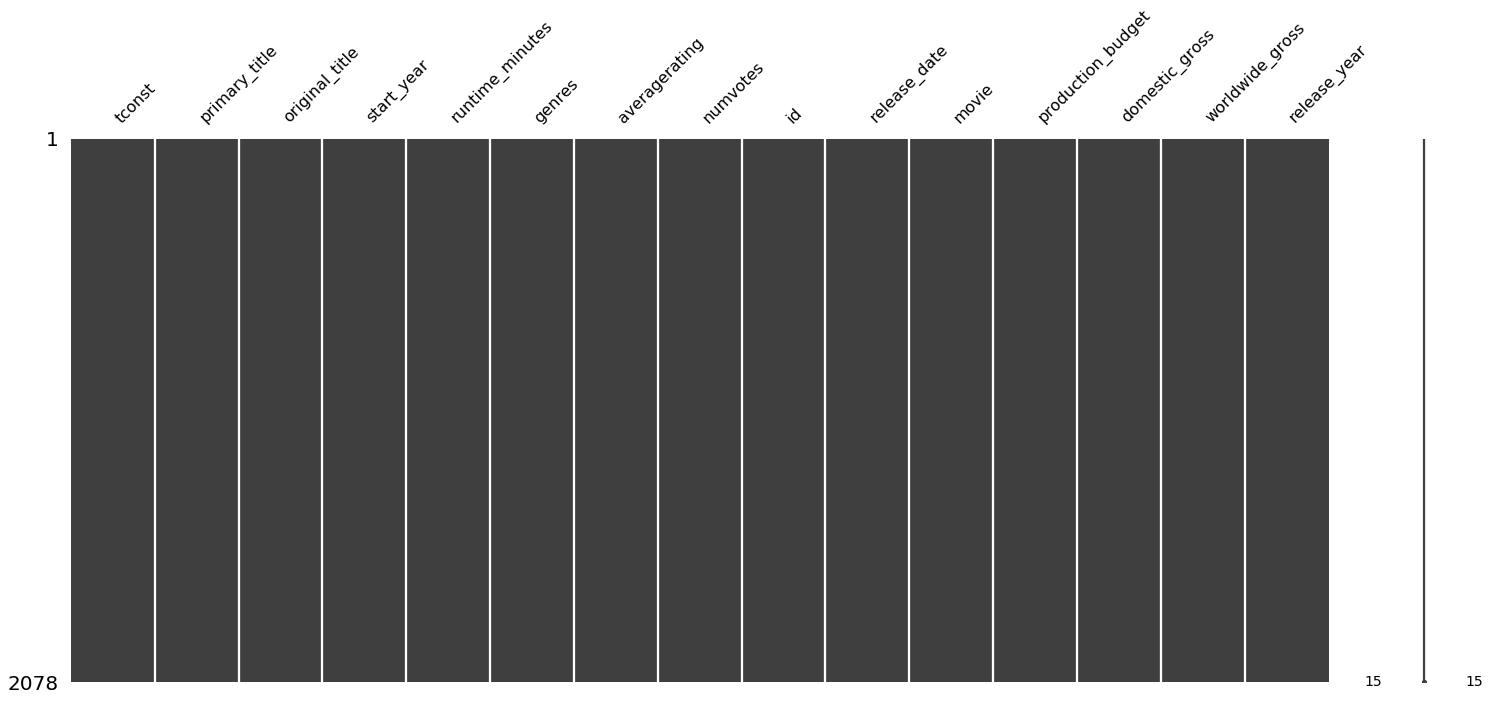

In [55]:
import missingno as ms
ms.matrix(DF)

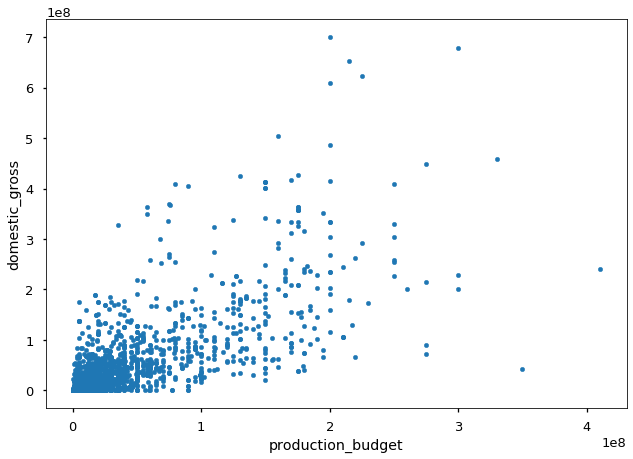

In [56]:
DF.plot(kind='scatter',x='production_budget',y='domestic_gross')

### Realized I am missing rating column

In [57]:
df5 = DATA['tmdb.movies'].copy()
df5.drop('Unnamed: 0',axis=1,inplace=True)


df5['release_date'] = pd.to_datetime(df5['release_date'])
df5 = df5[df5['release_date'] >='2010']



df5=df5.rename({'id':'tmdb_id'},axis=1)
df5

genre_ids  tmdb_id original_language  \
0          [12, 14, 10751]    12444                en   
1      [14, 12, 16, 10751]    10191                en   
2            [12, 28, 878]    10138                en   
4            [28, 878, 12]    27205                en   
5          [12, 14, 10751]    32657                en   
...                    ...      ...               ...   
26512             [27, 18]   488143                en   
26513             [18, 53]   485975                en   
26514         [14, 28, 12]   381231                en   
26515      [10751, 12, 28]   366854                en   
26516             [53, 27]   309885                en   

                                          original_title  popularity  \
0           Harry Potter and the Deathly Hallows: Part 1      33.533   
1                               How to Train Your Dragon      28.734   
2                                             Iron Man 2      28.515   
4                                              Inception      27.920   
5      Percy Jackson & the Olympians: The Lightning T...      26.691   
...                                                  ...         ...   
26512                              Laboratory Conditions       0.600   
26513                                    _EXHIBIT_84xxx_       0.600   
26514                                       The Last One       0.600   
26515                                       Trailer Made       0.600   
26516                                         The Church       0.600   

      release_date                                              title  \
0       2010-11-19       Harry Potter and the Deathly Hallows: Part 1   
1       2010-03-26                           How to Train Your Dragon   
2       2010-05-07                                         Iron Man 2   
4       2010-07-16                                          Inception   
5       2010-02-11  Percy Jackson & the Olympians: The Lightning T...   
...            ...                                                ...   
26512   2018-10-13                              Laboratory Conditions   
26513   2018-05-01                                    _EXHIBIT_84xxx_   
26514   2018-10-01                                       The Last One   
26515   2018-06-22                                       Trailer Made   
26516   2018-10-05                                         The Church   

       vote_average  vote_count  
0               7.7       10788  
1               7.7        7610  
2               6.8       12368  
4               8.3       22186  
5               6.1        4229  
...             ...         ...  
26512           0.0           1  
26513           0.0           1  
26514           0.0           1  
26515           0.0           1  
26516           0.0           1  

[26291 rows x 9 columns]

In [58]:
## Keep only english
df5 = df5.loc[df5['original_language']=='en']#.value_counts()
df5

genre_ids  tmdb_id original_language  \
0          [12, 14, 10751]    12444                en   
1      [14, 12, 16, 10751]    10191                en   
2            [12, 28, 878]    10138                en   
4            [28, 878, 12]    27205                en   
5          [12, 14, 10751]    32657                en   
...                    ...      ...               ...   
26512             [27, 18]   488143                en   
26513             [18, 53]   485975                en   
26514         [14, 28, 12]   381231                en   
26515      [10751, 12, 28]   366854                en   
26516             [53, 27]   309885                en   

                                          original_title  popularity  \
0           Harry Potter and the Deathly Hallows: Part 1      33.533   
1                               How to Train Your Dragon      28.734   
2                                             Iron Man 2      28.515   
4                                              Inception      27.920   
5      Percy Jackson & the Olympians: The Lightning T...      26.691   
...                                                  ...         ...   
26512                              Laboratory Conditions       0.600   
26513                                    _EXHIBIT_84xxx_       0.600   
26514                                       The Last One       0.600   
26515                                       Trailer Made       0.600   
26516                                         The Church       0.600   

      release_date                                              title  \
0       2010-11-19       Harry Potter and the Deathly Hallows: Part 1   
1       2010-03-26                           How to Train Your Dragon   
2       2010-05-07                                         Iron Man 2   
4       2010-07-16                                          Inception   
5       2010-02-11  Percy Jackson & the Olympians: The Lightning T...   
...            ...                                                ...   
26512   2018-10-13                              Laboratory Conditions   
26513   2018-05-01                                    _EXHIBIT_84xxx_   
26514   2018-10-01                                       The Last One   
26515   2018-06-22                                       Trailer Made   
26516   2018-10-05                                         The Church   

       vote_average  vote_count  
0               7.7       10788  
1               7.7        7610  
2               6.8       12368  
4               8.3       22186  
5               6.1        4229  
...             ...         ...  
26512           0.0           1  
26513           0.0           1  
26514           0.0           1  
26515           0.0           1  
26516           0.0           1  

[23106 rows x 9 columns]

In [59]:
df5.shape

(23106, 9)

In [60]:
df5[df5.duplicated(subset=['tmdb_id','original_title'],keep=False)].sort_values('original_title')

genre_ids  tmdb_id original_language  \
6315                 [99]    95383                en   
9191                 [99]    95383                en   
26340     [99, 36, 10770]   430364                en   
20070     [99, 36, 10770]   430364                en   
18016         [18, 10749]   416691                en   
...                   ...      ...               ...   
18361            [35, 18]   338387                en   
21676  [10752, 10751, 36]   472553                en   
25188  [10752, 10751, 36]   472553                en   
23452                [99]   376390                en   
20186                [99]   376390                en   

                                       original_title  popularity  \
6315                                       $ellebrity       1.420   
9191                                       $ellebrity       1.420   
26340  '85: The Greatest Team in Pro Football History       0.600   
20070  '85: The Greatest Team in Pro Football History       0.600   
18016                                         1 Night       5.409   
...                                               ...         ...   
18361                                 Youth in Oregon       2.534   
21676                                             Zoo       2.550   
25188                                             Zoo       2.550   
23452                                        המתנחלים       0.600   
20186                                        המתנחלים       0.600   

      release_date                                           title  \
6315    2013-01-11                                      $ellebrity   
9191    2013-01-11                                      $ellebrity   
26340   2018-01-29  '85: The Greatest Team in Pro Football History   
20070   2018-01-29  '85: The Greatest Team in Pro Football History   
18016   2017-02-10                                         1 Night   
...            ...                                             ...   
18361   2017-02-03                                 Youth in Oregon   
21676   2018-06-08                                             Zoo   
25188   2018-06-08                                             Zoo   
23452   2016-01-22                                    The Settlers   
20186   2016-01-22                                    The Settlers   

       vote_average  vote_count  
6315            5.6          12  
9191            5.6          12  
26340           7.5           2  
20070           7.5           2  
18016           6.4         107  
...             ...         ...  
18361           6.3          19  
21676           6.6          17  
25188           6.6          17  
23452           7.0           1  
20186           7.0           1  

[1768 rows x 9 columns]

In [61]:
df5.drop_duplicates(subset=['tmdb_id','original_title'],inplace=True)
df5

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


genre_ids  tmdb_id original_language  \
0          [12, 14, 10751]    12444                en   
1      [14, 12, 16, 10751]    10191                en   
2            [12, 28, 878]    10138                en   
4            [28, 878, 12]    27205                en   
5          [12, 14, 10751]    32657                en   
...                    ...      ...               ...   
26512             [27, 18]   488143                en   
26513             [18, 53]   485975                en   
26514         [14, 28, 12]   381231                en   
26515      [10751, 12, 28]   366854                en   
26516             [53, 27]   309885                en   

                                          original_title  popularity  \
0           Harry Potter and the Deathly Hallows: Part 1      33.533   
1                               How to Train Your Dragon      28.734   
2                                             Iron Man 2      28.515   
4                                              Inception      27.920   
5      Percy Jackson & the Olympians: The Lightning T...      26.691   
...                                                  ...         ...   
26512                              Laboratory Conditions       0.600   
26513                                    _EXHIBIT_84xxx_       0.600   
26514                                       The Last One       0.600   
26515                                       Trailer Made       0.600   
26516                                         The Church       0.600   

      release_date                                              title  \
0       2010-11-19       Harry Potter and the Deathly Hallows: Part 1   
1       2010-03-26                           How to Train Your Dragon   
2       2010-05-07                                         Iron Man 2   
4       2010-07-16                                          Inception   
5       2010-02-11  Percy Jackson & the Olympians: The Lightning T...   
...            ...                                                ...   
26512   2018-10-13                              Laboratory Conditions   
26513   2018-05-01                                    _EXHIBIT_84xxx_   
26514   2018-10-01                                       The Last One   
26515   2018-06-22                                       Trailer Made   
26516   2018-10-05                                         The Church   

       vote_average  vote_count  
0               7.7       10788  
1               7.7        7610  
2               6.8       12368  
4               8.3       22186  
5               6.1        4229  
...             ...         ...  
26512           0.0           1  
26513           0.0           1  
26514           0.0           1  
26515           0.0           1  
26516           0.0           1  

[22212 rows x 9 columns]

In [62]:
# df5[df5.duplicated(subset=['tmdb_id'])]

In [63]:
df5[df5.duplicated(subset=['original_title','genre_ids'],keep=False)].sort_values('original_title')

genre_ids  tmdb_id original_language original_title  popularity  \
18921         [18]   388697                en           1985       1.384   
24536         [18]   502220                en           1985       6.278   
18039         [18]   356752                en           AWOL       5.212   
4552          [18]   356753                en           AWOL       0.600   
10880           []   307156                en          Alone       0.600   
...            ...      ...               ...            ...         ...   
10604         [18]   257763                en           Torn       0.600   
21398         [27]   480210                en  Truth or Dare       4.354   
9685          [27]   227907                en  Truth or Dare       0.840   
11031  [18, 10402]   244786                en       Whiplash      28.784   
8293   [18, 10402]   367412                en       Whiplash       6.298   

      release_date          title  vote_average  vote_count  
18921   2016-03-11           1985           5.0           1  
24536   2018-10-26           1985           6.5          10  
18039   2017-05-19           AWOL           5.5          12  
4552    2011-01-21           AWOL           8.0           2  
10880   2013-11-03          Alone           3.5           2  
...            ...            ...           ...         ...  
10604   2013-03-02           Torn           5.3           2  
21398   2017-10-08  Truth or Dare           5.2          50  
9685    2013-09-13  Truth or Dare           4.7           3  
11031   2014-10-10       Whiplash           8.4        7908  
8293    2013-01-18       Whiplash           7.9          94  

[92 rows x 9 columns]

In [64]:
# df5 = df5.drop_duplicates(subset=['original_title'])
# df5

In [65]:
# df5[df5.duplicated(subset=['title'],keep=False)].sort_values('original_title')
df5.head()

genre_ids  tmdb_id original_language  \
0      [12, 14, 10751]    12444                en   
1  [14, 12, 16, 10751]    10191                en   
2        [12, 28, 878]    10138                en   
4        [28, 878, 12]    27205                en   
5      [12, 14, 10751]    32657                en   

                                      original_title  popularity release_date  \
0       Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                           How to Train Your Dragon      28.734   2010-03-26   
2                                         Iron Man 2      28.515   2010-05-07   
4                                          Inception      27.920   2010-07-16   
5  Percy Jackson & the Olympians: The Lightning T...      26.691   2010-02-11   

                                               title  vote_average  vote_count  
0       Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                           How to Train Your Dragon           7.7        7610  
2                                         Iron Man 2           6.8       12368  
4                                          Inception           8.3       22186  
5  Percy Jackson & the Olympians: The Lightning T...           6.1        4229

In [66]:
DF.head()

tconst  primary_title original_title  start_year  runtime_minutes  \
0  tt0249516     Foodfight!     Foodfight!        2012             91.0   
1  tt0326592  The Overnight  The Overnight        2010             88.0   
2  tt3844362  The Overnight  The Overnight        2015             79.0   
3  tt0337692    On the Road    On the Road        2012            124.0   
4  tt4339118    On the Road    On the Road        2014             89.0   

                    genres  averagerating  numvotes  id release_date  \
0  Action,Animation,Comedy            1.9      8248  26   2012-12-31   
1                  MISSING            7.5        24  21   2015-06-19   
2           Comedy,Mystery            6.1     14828  21   2015-06-19   
3  Adventure,Drama,Romance            6.1     37886  17   2013-03-22   
4                    Drama            6.0         6  17   2013-03-22   

           movie  production_budget  domestic_gross  worldwide_gross  \
0     Foodfight!           45000000               0            73706   
1  The Overnight             200000         1109808          1165996   
2  The Overnight             200000         1109808          1165996   
3    On the Road           25000000          720828          9313302   
4    On the Road           25000000          720828          9313302   

   release_year  
0          2012  
1          2015  
2          2015  
3          2013  
4          2013

In [67]:
pd.set_option('display.max_columns',0)

In [68]:
DF2A = pd.merge(DF,df5,on='original_title')
DF2A

tconst            primary_title  ... vote_average  vote_count
0     tt0249516               Foodfight!  ...          2.1          46
1     tt0326592            The Overnight  ...          6.0         200
2     tt3844362            The Overnight  ...          6.0         200
3     tt0337692              On the Road  ...          5.6         518
4     tt4339118              On the Road  ...          5.6         518
...         ...                      ...  ...          ...         ...
2154  tt7374952               El Chicano  ...          9.0           1
2155  tt7388562  Paul, Apostle of Christ  ...          7.1          98
2156  tt7401588           Instant Family  ...          7.6         782
2157  tt7784604               Hereditary  ...          7.0        2491
2158  tt8632862          Fahrenheit 11/9  ...          7.1         142

[2159 rows x 23 columns]

In [69]:
DF2 = pd.merge(DF,df5,left_on='original_title',right_on='original_title')
DF2

tconst            primary_title  ... vote_average  vote_count
0     tt0249516               Foodfight!  ...          2.1          46
1     tt0326592            The Overnight  ...          6.0         200
2     tt3844362            The Overnight  ...          6.0         200
3     tt0337692              On the Road  ...          5.6         518
4     tt4339118              On the Road  ...          5.6         518
...         ...                      ...  ...          ...         ...
2154  tt7374952               El Chicano  ...          9.0           1
2155  tt7388562  Paul, Apostle of Christ  ...          7.1          98
2156  tt7401588           Instant Family  ...          7.6         782
2157  tt7784604               Hereditary  ...          7.0        2491
2158  tt8632862          Fahrenheit 11/9  ...          7.1         142

[2159 rows x 23 columns]

In [70]:
(DF2['release_date_x']==DF2['release_date_y']).sum()

0

In [71]:
DF2['start_year'] 

0       2012
1       2010
2       2015
3       2012
4       2014
        ... 
2154    2018
2155    2018
2156    2018
2157    2018
2158    2018
Name: start_year, Length: 2159, dtype: int64

In [72]:
## saving list of columns for future
id_cols = ['id','tmdb_id','tconst']
for col in id_cols:
    DF2[col] = DF2[col].astype(str)

In [73]:
DF2.select_dtypes('object')

tconst  ...                    title
0     tt0249516  ...               Foodfight!
1     tt0326592  ...            The Overnight
2     tt3844362  ...            The Overnight
3     tt0337692  ...              On the Road
4     tt4339118  ...              On the Road
...         ...  ...                      ...
2154  tt7374952  ...               El Chicano
2155  tt7388562  ...  Paul, Apostle of Christ
2156  tt7401588  ...           Instant Family
2157  tt7784604  ...               Hereditary
2158  tt8632862  ...          Fahrenheit 11/9

[2159 rows x 11 columns]

In [74]:
DF2.select_dtypes('number')

start_year  runtime_minutes  ...  vote_average  vote_count
0           2012             91.0  ...           2.1          46
1           2010             88.0  ...           6.0         200
2           2015             79.0  ...           6.0         200
3           2012            124.0  ...           5.6         518
4           2014             89.0  ...           5.6         518
...          ...              ...  ...           ...         ...
2154        2018            108.0  ...           9.0           1
2155        2018            108.0  ...           7.1          98
2156        2018            118.0  ...           7.6         782
2157        2018            127.0  ...           7.0        2491
2158        2018            128.0  ...           7.1         142

[2159 rows x 11 columns]

In [75]:
# DF2[DF2.duplicated(subset=['tmdb_id'],keep=False)]

In [76]:
DF2.isna().sum()

tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
id                   0
release_date_x       0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
genre_ids            0
tmdb_id              0
original_language    0
popularity           0
release_date_y       0
title                0
vote_average         0
vote_count           0
dtype: int64

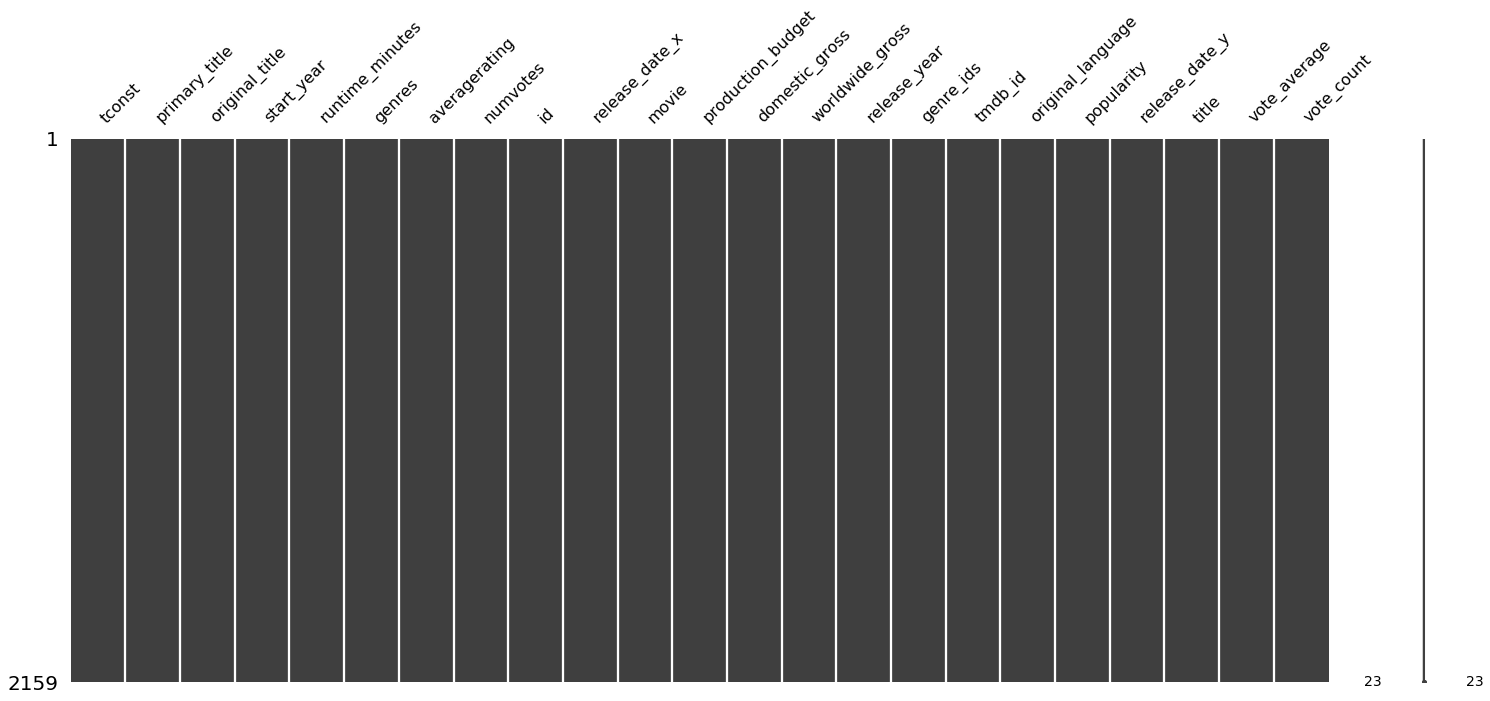

In [77]:
ms.matrix(DF2)

In [78]:
len(DF2)

2159

In [79]:
DF2.dropna(inplace=True)
len(DF2)

2159

In [80]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 23 columns):
tconst               2159 non-null object
primary_title        2159 non-null object
original_title       2159 non-null object
start_year           2159 non-null int64
runtime_minutes      2159 non-null float64
genres               2159 non-null object
averagerating        2159 non-null float64
numvotes             2159 non-null int64
id                   2159 non-null object
release_date_x       2159 non-null object
movie                2159 non-null object
production_budget    2159 non-null int64
domestic_gross       2159 non-null int64
worldwide_gross      2159 non-null int64
release_year         2159 non-null int64
genre_ids            2159 non-null object
tmdb_id              2159 non-null object
original_language    2159 non-null object
popularity           2159 non-null float64
release_date_y       2159 non-null datetime64[ns]
title                2159 non-null object
vote_a

In [81]:
DF2[DF2.duplicated(subset=['tconst','worldwide_gross'],keep=False)]

tconst       primary_title  ... vote_average  vote_count
24    tt0451279        Wonder Woman  ...          5.9          34
25    tt0451279        Wonder Woman  ...          7.3       12566
26    tt4028068        Wonder Woman  ...          5.9          34
27    tt4028068        Wonder Woman  ...          7.3       12566
28    tt4283448        Wonder Woman  ...          5.9          34
...         ...                 ...  ...          ...         ...
2118  tt6184774  Let There Be Light  ...          7.3           3
2129  tt6306064              Adrift  ...          7.0           1
2130  tt6306064              Adrift  ...          6.7        1264
2148  tt7137846         Breaking In  ...          2.5           2
2149  tt7137846         Breaking In  ...          5.9         290

[497 rows x 23 columns]

In [82]:
DF2.drop_duplicates(subset=['tconst','worldwide_gross'],inplace=True)

In [83]:
DF2

tconst            primary_title  ... vote_average  vote_count
0     tt0249516               Foodfight!  ...          2.1          46
1     tt0326592            The Overnight  ...          6.0         200
2     tt3844362            The Overnight  ...          6.0         200
3     tt0337692              On the Road  ...          5.6         518
4     tt4339118              On the Road  ...          5.6         518
...         ...                      ...  ...          ...         ...
2154  tt7374952               El Chicano  ...          9.0           1
2155  tt7388562  Paul, Apostle of Christ  ...          7.1          98
2156  tt7401588           Instant Family  ...          7.6         782
2157  tt7784604               Hereditary  ...          7.0        2491
2158  tt8632862          Fahrenheit 11/9  ...          7.1         142

[1867 rows x 23 columns]

## Now that I did an inner join I have 1,952

In [84]:
cols_of_interest = ['tmdb_id','tconst','primary_title','original_title','movie',
                    'runtime_minutes','genres','genre_ids','averagerating',
                    'numvotes','release_date_x','release_date_y','vote_average',
                    'vote_count','popularity','domestic_gross',
                    'production_budget','worldwide_gross']

cols_unwanted = [col for col in df.columns if col not in cols_of_interest]
cols_unwanted

['start_year']

In [85]:
df = DF2[cols_of_interest].reset_index(drop=True).copy()
df

tmdb_id     tconst  ... production_budget worldwide_gross
0     116977  tt0249516  ...          45000000           73706
1     308024  tt0326592  ...            200000         1165996
2     308024  tt3844362  ...            200000         1165996
3      83770  tt0337692  ...          25000000         9313302
4      83770  tt4339118  ...          25000000         9313302
...      ...        ...  ...               ...             ...
1862  547590  tt7374952  ...           8000000          700261
1863  476968  tt7388562  ...           5000000        25529498
1864  491418  tt7401588  ...          48000000       119736188
1865  493922  tt7784604  ...          10000000        70133905
1866  532908  tt8632862  ...           5000000         6653715

[1867 rows x 18 columns]

In [86]:
df[df.duplicated(subset=['tconst'])]

tmdb_id     tconst  ... production_budget worldwide_gross
108   295180  tt0882977  ...            850000               0
128    20662  tt0955308  ...          99000000        84747441
130    20662  tt2363363  ...          99000000        84747441
132    20662  tt4532826  ...          99000000        84747441
211    68727  tt1111235  ...            950000               0
213    68727  tt1924429  ...            950000               0
1778  401246  tt4995790  ...           1500000          176262

[7 rows x 18 columns]

In [87]:
# df.to_csv('best_combined_movies.csv')

# df.to_csv('movies_combined_tmdb_id_for_api.csv',index=False)
# DF2

#  📕BOOKMARK  START HERE

# Adding API Results with imdb+tmbd ids

In [144]:
from fsds.imports import *

In [183]:
df_api = pd.read_csv('__api_results_combined.csv',index_col=0,
                         parse_dates=['release_date_cert','release_date'])
df_api

id  ...                production_companies_origin_country
0     116977  ...                             ['', 'US', '', '', '']
1     308024  ...                                         ['US', '']
5      83770  ...  ['', 'US', '', '', 'FR', 'FR', 'BR', 'AR', 'CA...
14    116745  ...       ['GB', 'US', 'US', 'US', '', '', 'US', 'US']
15    169917  ...               ['', '', '', 'US', 'US', '', '', '']
...      ...  ...                                                ...
3362  547590  ...                                             ['US']
3363  476968  ...                                     ['', 'US', '']
3364  491418  ...                                 ['US', 'US', 'US']
3365  493922  ...                                             ['US']
3366  532908  ...                                     ['', '', 'US']

[1586 rows x 20 columns]

In [191]:
df = pd.read_csv('movies_combined_tmdb_id_for_api.csv')
df

tmdb_id     tconst  ... production_budget worldwide_gross
0      116977  tt0249516  ...          45000000           73706
1      308024  tt0326592  ...            200000         1165996
2      308024  tt3844362  ...            200000         1165996
3       83770  tt0337692  ...          25000000         9313302
4       83770  tt4339118  ...          25000000         9313302
...       ...        ...  ...               ...             ...
1862   547590  tt7374952  ...           8000000          700261
1863   476968  tt7388562  ...           5000000        25529498
1864   491418  tt7401588  ...          48000000       119736188
1865   493922  tt7784604  ...          10000000        70133905
1866   532908  tt8632862  ...           5000000         6653715

[1867 rows x 18 columns]

In [192]:
df.columns

Index(['tmdb_id', 'tconst', 'primary_title', 'original_title', 'movie',
       'runtime_minutes', 'genres', 'genre_ids', 'averagerating', 'numvotes',
       'release_date_x', 'release_date_y', 'vote_average', 'vote_count',
       'popularity', 'domestic_gross', 'production_budget', 'worldwide_gross'],
      dtype='object')

In [193]:
df_api.columns

Index(['id', 'rating', 'release_date_cert', 'imdb_id', 'title', 'budget',
       'release_date', 'revenue', 'runtime', 'original_language',
       'original_title', 'vote_average', 'vote_count', 'poster_path',
       'genres_id', 'genres_name', 'spoken_languages_name',
       'production_companies_id', 'production_companies_name',
       'production_companies_origin_country'],
      dtype='object')

In [194]:
[col for col in df.columns if col not in df_api.columns]

['tmdb_id',
 'tconst',
 'primary_title',
 'movie',
 'runtime_minutes',
 'genres',
 'genre_ids',
 'averagerating',
 'numvotes',
 'release_date_x',
 'release_date_y',
 'popularity',
 'domestic_gross',
 'production_budget',
 'worldwide_gross']

In [203]:
keep_cols = ['tmdb_id','tconst','popularity','domestic_gross','worldwide_gross']

In [204]:
DF_MERGE = pd.merge(df_api, df[keep_cols], left_on = 'id',right_on='tmdb_id')

In [205]:
DF_MERGE

id rating  ... domestic_gross worldwide_gross
0     116977     PG  ...              0           73706
1     308024      R  ...        1109808         1165996
2     308024      R  ...        1109808         1165996
3      83770      R  ...         720828         9313302
4      83770      R  ...         720828         9313302
...      ...    ...  ...            ...             ...
1862  547590    NaN  ...         700261          700261
1863  476968  PG-13  ...       17547999        25529498
1864  491418  PG-13  ...       67363237       119736188
1865  493922      R  ...       44069456        70133905
1866  532908      R  ...        6352306         6653715

[1867 rows x 25 columns]

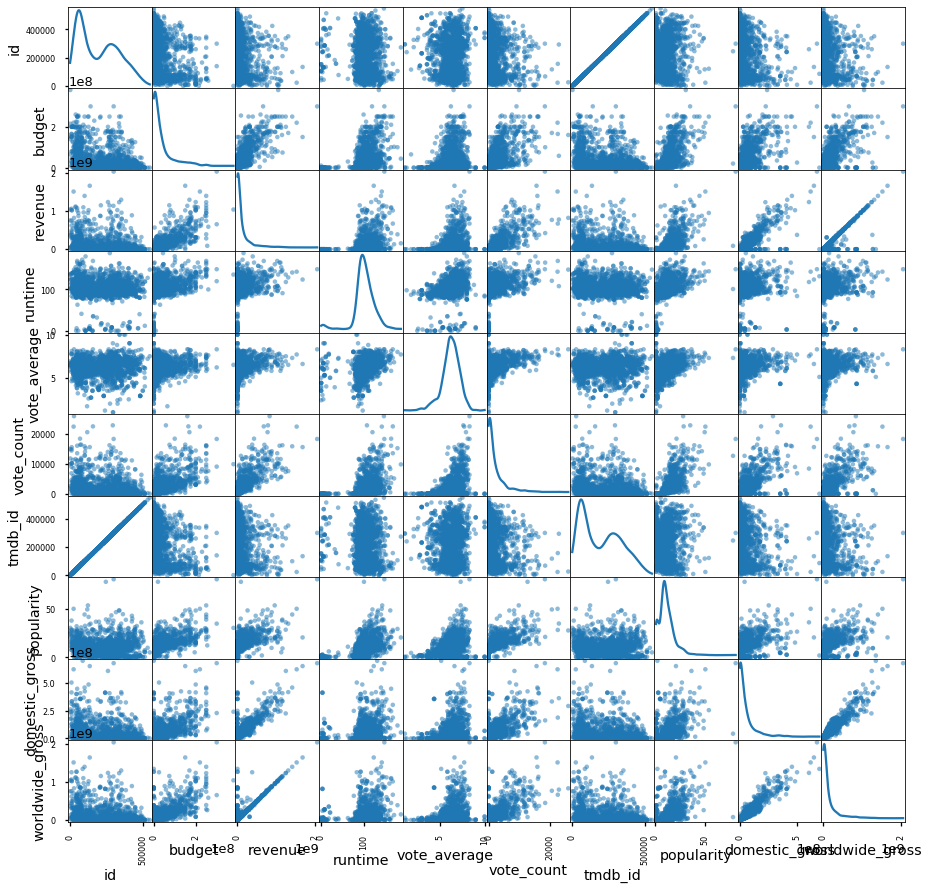

In [206]:
with plt.style.context('seaborn-talk'):

    plt.rcParams['figure.figsize'] = (15,15)
    axes = pd.plotting.scatter_matrix(DF_MERGE,diagonal='kde')#,c='vote_count');

In [207]:
revenue_cols = ['revenue','budget']
corr = DF_MERGE.corr()[['revenue']]
corr_tf = corr.apply(lambda x: np.abs(x) > 0.5)

corr.style.background_gradient(cmap='Greens').set_caption('Correlation Matrix')


In [149]:
# corr.style.bar()

# BOOKMARK - Got new df in tmdb_api.ipynb

In [150]:
# plt.rcParams['figure.figsize'] = (20,20)
# pd.plotting.scatter_matrix(df,diagonal='kde');

In [208]:
DF_MERGE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 25 columns):
id                                     1867 non-null int64
rating                                 1644 non-null object
release_date_cert                      1864 non-null datetime64[ns, UTC]
imdb_id                                1863 non-null object
title                                  1867 non-null object
budget                                 1867 non-null int64
release_date                           1867 non-null datetime64[ns]
revenue                                1867 non-null int64
runtime                                1861 non-null float64
original_language                      1867 non-null object
original_title                         1867 non-null object
vote_average                           1867 non-null float64
vote_count                             1867 non-null int64
poster_path                            1783 non-null object
genres_id                         

In [209]:
DF_MERGE.columns

Index(['id', 'rating', 'release_date_cert', 'imdb_id', 'title', 'budget',
       'release_date', 'revenue', 'runtime', 'original_language',
       'original_title', 'vote_average', 'vote_count', 'poster_path',
       'genres_id', 'genres_name', 'spoken_languages_name',
       'production_companies_id', 'production_companies_name',
       'production_companies_origin_country', 'tmdb_id', 'tconst',
       'popularity', 'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [153]:
## pd.merge(df_api, df,how='outer',left_on='id',right_on='tmdb_id')

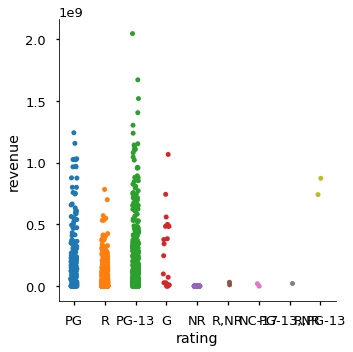

In [210]:
# df1=ratings_api.copy()
fg = sns.catplot(data=DF_MERGE,x='rating',y='revenue')

In [211]:
# df.set_index('tmdb_id',inplace=True)
# df_api.set_index('id',inplace=True)

# display(df.head(),df_api.head())

In [212]:
# df['rating'] = df_api['rating']
# df

In [213]:
DF_MERGE.groupby('rating').get_group('G')

id rating  ... domestic_gross worldwide_gross
19     10193      G  ...      415004880      1068879522
59     38843      G  ...       26167002        27469621
281    49013      G  ...      191450875       560155383
304    49953      G  ...              0        71594792
519    46195      G  ...      143619809       487519809
520    46195      G  ...      143619809       487519809
521    46195      G  ...      143619809       487519809
541    51162      G  ...       26692846        50145607
542    62211      G  ...      268488329       743588329
576    44010      G  ...      226277068       615461394
577    44010      G  ...      226277068       615461394
585   172391      G  ...              0        20898221
586   133931      G  ...              0        34454336
738    55301      G  ...      133107389       349088523
856    54518      G  ...       73013910        99034125
1108  157841      G  ...         176847          357687
1333  172385      G  ...      131538435       492846291
1389  227973      G  ...      130178411       250091610
1468   10020      G  ...      504014165      1259199706
1620  260514      G  ...      152901115       383541369

[20 rows x 25 columns]

## SAVING FINAL DF

In [214]:
DF_MERGE.to_csv("__FINAL_MOVIES_DATASET.csv",index=False)

In [216]:
df = pd.read_csv('__FINAL_MOVIES_DATASET.csv',parse_dates=['release_date_cert'])
df

id rating  ... domestic_gross worldwide_gross
0     116977     PG  ...              0           73706
1     308024      R  ...        1109808         1165996
2     308024      R  ...        1109808         1165996
3      83770      R  ...         720828         9313302
4      83770      R  ...         720828         9313302
...      ...    ...  ...            ...             ...
1862  547590    NaN  ...         700261          700261
1863  476968  PG-13  ...       17547999        25529498
1864  491418  PG-13  ...       67363237       119736188
1865  493922      R  ...       44069456        70133905
1866  532908      R  ...        6352306         6653715

[1867 rows x 25 columns]

In [172]:
df.dropna(inplace=True, subset=['rating'])
df.isna().sum()

tmdb_id              0
tconst               0
primary_title        0
original_title       0
movie                0
runtime_minutes      0
genres               0
genre_ids            0
averagerating        0
numvotes             0
release_date_x       0
release_date_y       0
vote_average         0
vote_count           0
popularity           0
domestic_gross       0
production_budget    0
worldwide_gross      0
rating               0
dtype: int64

In [178]:
drop_cols = ['primary_title','original_title', 'genre_ids']
df.drop(columns=drop_cols,inplace=True)

In [181]:
df

tmdb_id     tconst  ... worldwide_gross  rating
0      116977  tt0249516  ...           73706      PG
1      308024  tt0326592  ...         1165996       R
2      308024  tt3844362  ...         1165996       R
3       83770  tt0337692  ...         9313302       R
4       83770  tt4339118  ...         9313302       R
...       ...        ...  ...             ...     ...
1861   487558  tt7349662  ...        93017335       R
1863   476968  tt7388562  ...        25529498   PG-13
1864   491418  tt7401588  ...       119736188   PG-13
1865   493922  tt7784604  ...        70133905       R
1866   532908  tt8632862  ...         6653715       R

[1644 rows x 16 columns]

In [182]:
df.to_csv("__FINAL_MOVIES_DATASET.csv")

## Formatting $Millions

In [102]:
def millions(x, pos):
    '''The two args are the value and tick position;
    From https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html'''
    # Ref https://www.w3schools.com/python/ref_string_format.asp
    return '$ %1.0fM' % (x * 1e-6)

formatter = mpl.ticker.FuncFormatter(millions)

In [103]:
df['domestic_gross'].describe()

count    1.867000e+03
mean     4.977350e+07
std      7.963117e+07
min      0.000000e+00
25%      1.012321e+06
50%      2.156951e+07
75%      5.994839e+07
max      7.000596e+08
Name: domestic_gross, dtype: float64

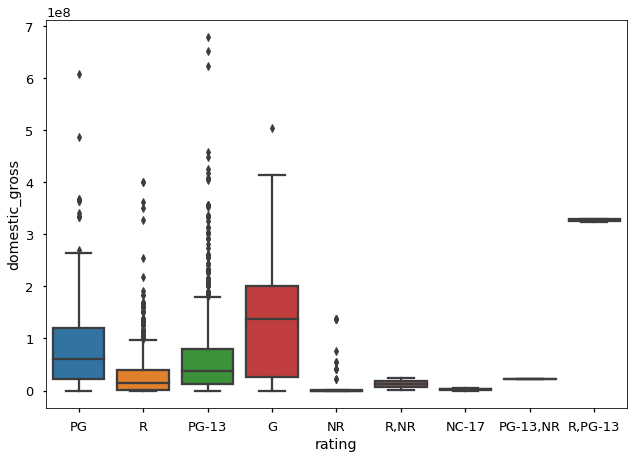

In [104]:
sns.boxplot(data=df,x='rating',y='domestic_gross')

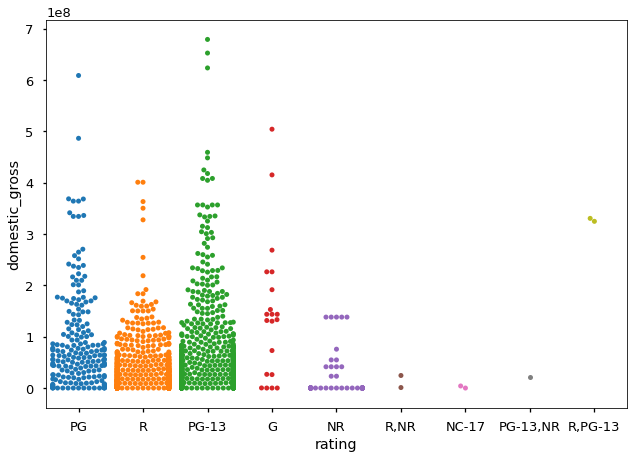

In [105]:
sns.swarmplot(data=df,x='rating',y='domestic_gross')

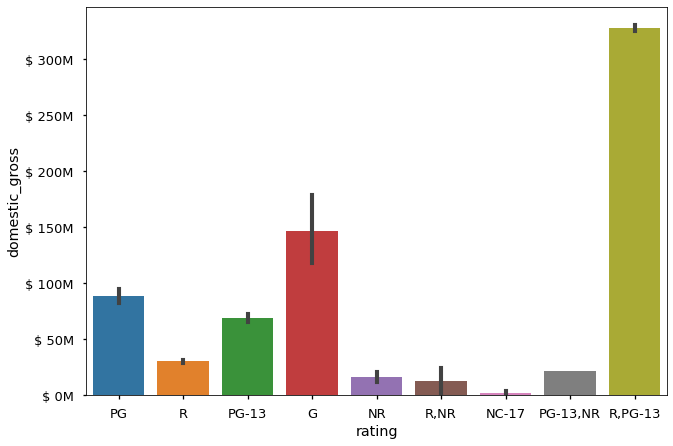

In [106]:
ax = sns.barplot(data=df,x='rating',y='domestic_gross',ci=68)
ax.yaxis.set_major_formatter(formatter)

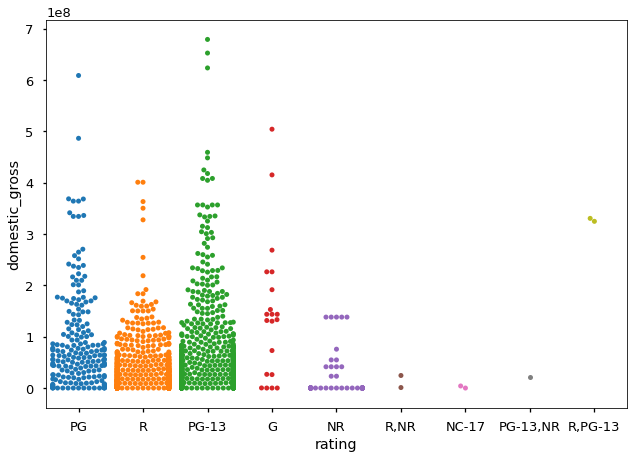

In [107]:
sns.swarmplot(data=df,x='rating',y='domestic_gross')#,ci=68)

# GENRES

In [110]:
df['genres']

tmdb_id
116977      Action,Animation,Comedy
308024                      MISSING
308024               Comedy,Mystery
83770       Adventure,Drama,Romance
83770                         Drama
                    ...            
547590                        Drama
476968    Adventure,Biography,Drama
491418                 Comedy,Drama
493922         Drama,Horror,Mystery
532908                  Documentary
Name: genres, Length: 1867, dtype: object

In [111]:
# df= pd.read_csv('best_combined_movies.csv',index_col=0)
# df

In [112]:
combined = ','.join(df['genres'])
all_genres = list(set(combined.split(',')))
all_genres

['Drama',
 'Action',
 'Horror',
 'Comedy',
 'Romance',
 'History',
 'Documentary',
 'News',
 'Crime',
 'Sport',
 'Fantasy',
 'MISSING',
 'Animation',
 'Family',
 'Adventure',
 'Mystery',
 'War',
 'Sci-Fi',
 'Western',
 'Biography',
 'Thriller',
 'Musical',
 'Music']

In [113]:
all_genres = ','.join(df['genres']).split(',')
all_genres = list(set(all_genres))
all_genres

['Drama',
 'Action',
 'Horror',
 'Comedy',
 'Romance',
 'History',
 'Documentary',
 'News',
 'Crime',
 'Sport',
 'Fantasy',
 'MISSING',
 'Animation',
 'Family',
 'Adventure',
 'Mystery',
 'War',
 'Sci-Fi',
 'Western',
 'Biography',
 'Thriller',
 'Musical',
 'Music']

In [114]:
genre_df = pd.DataFrame()
for genre in all_genres:
    genre_df[genre] = df['genres'].str.contains(genre).astype(int)

In [115]:
genre_df

Drama  Action  Horror  Comedy  ...  Biography  Thriller  Musical  Music
tmdb_id                                 ...                                     
116977       0       1       0       1  ...          0         0        0      0
308024       0       0       0       0  ...          0         0        0      0
308024       0       0       0       1  ...          0         0        0      0
83770        1       0       0       0  ...          0         0        0      0
83770        1       0       0       0  ...          0         0        0      0
...        ...     ...     ...     ...  ...        ...       ...      ...    ...
547590       1       0       0       0  ...          0         0        0      0
476968       1       0       0       0  ...          1         0        0      0
491418       1       0       0       1  ...          0         0        0      0
493922       1       0       1       0  ...          0         0        0      0
532908       0       0       0       0  ...          0         0        0      0

[1867 rows x 23 columns]

In [116]:
df =pd.concat([df,genre_df],axis=1)
df

tconst            primary_title  ... Musical Music
tmdb_id                                      ...              
116977   tt0249516               Foodfight!  ...       0     0
308024   tt0326592            The Overnight  ...       0     0
308024   tt3844362            The Overnight  ...       0     0
83770    tt0337692              On the Road  ...       0     0
83770    tt4339118              On the Road  ...       0     0
...            ...                      ...  ...     ...   ...
547590   tt7374952               El Chicano  ...       0     0
476968   tt7388562  Paul, Apostle of Christ  ...       0     0
491418   tt7401588           Instant Family  ...       0     0
493922   tt7784604               Hereditary  ...       0     0
532908   tt8632862          Fahrenheit 11/9  ...       0     0

[1867 rows x 41 columns]

In [117]:
genre_dfs = {}
for genre in all_genres:
    genre_dfs[genre] = df.groupby(genre).get_group(1)
    

In [118]:
genre_dfs.keys()

dict_keys(['Drama', 'Action', 'Horror', 'Comedy', 'Romance', 'History', 'Documentary', 'News', 'Crime', 'Sport', 'Fantasy', 'MISSING', 'Animation', 'Family', 'Adventure', 'Mystery', 'War', 'Sci-Fi', 'Western', 'Biography', 'Thriller', 'Musical', 'Music'])

In [119]:
genre_dfs['Crime']

tconst                 primary_title  ... Musical Music
tmdb_id                                           ...              
169917   tt0365907   A Walk Among the Tombstones  ...       0     0
156022   tt0455944                 The Equalizer  ...       0     0
189      tt0458481  Sin City: A Dame to Kill For  ...       0     0
59108    tt0471042                   Tower Heist  ...       0     0
27582    tt0472399                  The Mechanic  ...       0     0
...            ...                           ...  ...     ...   ...
458594   tt6850820                    Peppermint  ...       0     0
484247   tt7040874                A Simple Favor  ...       0     0
471507   tt7137380                     Destroyer  ...       0     0
403153   tt7137846                   Breaking In  ...       0     0
487558   tt7349662                BlacKkKlansman  ...       0     0

[279 rows x 41 columns]

In [126]:
profit_cols = ['domestic_gross','production_budget','worldwide_gross']

plot_dict={}

for col in profit_cols:
    plot_dict[col] = {}
    
    for genre,genre_df in genre_dfs.items():
        plot_dict[col][genre] = genre_df[col].reset_index()

plot_dict.keys()

dict_keys(['domestic_gross', 'production_budget', 'worldwide_gross'])

In [127]:
plot_dict['domestic_gross'].keys()

dict_keys(['Drama', 'Action', 'Horror', 'Comedy', 'Romance', 'History', 'Documentary', 'News', 'Crime', 'Sport', 'Fantasy', 'MISSING', 'Animation', 'Family', 'Adventure', 'Mystery', 'War', 'Sci-Fi', 'Western', 'Biography', 'Thriller', 'Musical', 'Music'])

In [132]:
# pd.DataFrame(plot_dict['domestic_gross'],index=[0])

In [133]:
# domestic = pd.DataFrame.from_dict(plot_dict['domestic_gross'])
# domestic.sum().plot(kind='barh')

In [123]:
# domestic

NameError: name 'domestic' is not defined

In [134]:
# sns.barplot(data=domestic,orient='h',ci=68)

In [135]:
# ax = sns.catplot(data=domestic,aspect=2)
# ax
# ax.set_xticklabels(ax.get_xticklabels(),ha='right',rotation=45)

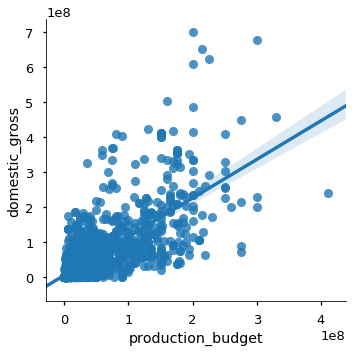

In [137]:
sns.lmplot('production_budget','domestic_gross',df)#,hue='')

# OLD

### Plotly Express

In [138]:
## Visua
import plotly.express as px
px.scatter(df,y='domestic_gross',x='production_budget',hover_name='movie',
           hover_data=['domestic_gross','production_budget'],trendline='ols')
# px.scatter(df1,y='domestic_gross',
#          x='rating',
#          color='rating')#

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [139]:
import plotly.express as px
# px.scatter(df1,y='domestic_gross',x='runtime',hover_name='movie',
#            hover_data=['domestic_gross','production_budget'],
#        color='rating',trendline='ols')
# # px.scatter(df1,y='domestic_gross',
# #          x='rating',
# #          color='rating')#

In [140]:
# DATA['tn.movie_budgets']

## Aligning The Data

- Make a dictionary of column name to use as key for each dataframe stored in DATA

<details >
    <summary style="font-size:1.1em;background-color:lightblue;width:80%;text-align:center;                   "> Key Columns</summary>    
    
```python
KEY_COLS = {'imdb.title.crew': 'tconst', 
        'tmdb.movies': 'id',
        'imdb.title.akas': 'title_id',
        'imdb.title.ratings': 'tconst',
        'imdb.name.basics': 'nconst',
        'rt.reviews.': 'id',
        'imdb.title.basics': 'tconst',
        'rt.movie_info.': 'id',
        'tn.movie_budgets': 'id',
        'bom.movie_gross': 'title',
        'imdb.title.principals': 'tconst'}
```


In [141]:
# # keys = list(DATA.keys())

# KEY_COLS = {'imdb.title.crew': 'tconst', 
#         'tmdb.movies': 'id',
#         'imdb.title.akas': 'title_id',
#         'imdb.title.ratings': 'tconst',
#         'imdb.name.basics': 'nconst',
#         'rt.reviews.': 'id',
#         'imdb.title.basics': 'tconst',
#         'rt.movie_info.': 'id',
#         'tn.movie_budgets': 'id',
#         'bom.movie_gross': 'title',
#         'imdb.title.principals': 'tconst'}

In [142]:
# DATA['imdb.title.principals']

In [143]:
# unique_tconst = {}
# for table_name,key_col in KEY_COLS.items():
#     table = DATA[table_name]
#     print(table_name)
# #     print(key_col)

#     if 'tconst' in key_col:
#         print(key_col)
#         print()

#         unique_tconst[table_name] = table[key_col].unique()
#     else:
#         print('N/A')
        
#     print()


In [ ]:
# unique_tconst

In [ ]:
[len(v) for x,v in unique_tconst.items()]

In [ ]:
matching_key_cols = [k for k in unique_tconst if len(unique_tconst[k])==146144 ]
matching_key_cols

In [ ]:
df_imdb = pd.merge(DATA['imdb.title.crew'],DATA['imdb.title.basics'],
                   how='outer',suffixes=('crew','basics') )
df_imdb

In [ ]:
non_matching_key_cols = [k for k in unique_tconst if len(unique_tconst[k])!=146144 ]
non_matching_key_cols

In [ ]:
[DATA[x].shape for x in non_matching_key_cols] 

### Notes: COLUMNNS OF INTEREST
    - "averagerating"(imdb.ratings)

In [ ]:
display(DATA[non_matching_key_cols[0]],DATA[non_matching_key_cols[1]])

In [ ]:
df_imdb

In [ ]:
DATA['imdb.title.ratings']

In [ ]:
df = pd.merge(df_imdb, DATA['imdb.title.ratings'],on='tconst',how='outer')
df

In [ ]:
df.info()

In [ ]:
plt.rcParams['figure.figsize'] = [12,10]

In [ ]:
scatmat = pd.plotting.scatter_matrix(df);

In [ ]:
import missingno as ms
ms.matrix(df)

In [ ]:
df[df['runtime_minutes'].isna()].isna().sum()

In [ ]:
rated = df[df['averagerating'].notnull()].copy()
rated

In [ ]:
scatmat = pd.plotting.scatter_matrix(rated);

In [ ]:
import seaborn as sns
sns.jointplot('averagerating','runtime_minutes',data=rated,kind='reg')

In [ ]:
sns.boxplot(x='start_year',y='runtime_minutes',data=rated)

In [ ]:
import scipy.stats as st

rated['runtime_minutes']

In [ ]:
rated.isna().sum()/len(rated)

In [ ]:
rated.dropna(inplace=True)

In [ ]:
idx_outs = np.abs(st.zscore(rated['runtime_minutes'])) >3
idx_outs.sum()

In [ ]:
sns.jointplot('averagerating','runtime_minutes',data=rated,kind='reg')

In [ ]:
rated['outlier'] = idx_outs

In [ ]:
sns.lmplot(x='averagerating',y='runtime_minutes',data=rated,hue='outlier')

In [ ]:
sns.lmplot(x='averagerating',y='runtime_minutes',data=rated[~idx_outs],hue='outlier')

In [ ]:
# stop

# Joining dfrt (gross) + df_imdb

In [ ]:
dfrt.head()

In [ ]:
df.head()

# Using Movie DataBase API
- https://rapidapi.com/rapidapi/api/movie-database-imdb-alternative/details

In [ ]:
stop

In [ ]:
df = DATA['tn.movie_budgets']
df

In [ ]:
df['movie']

In [ ]:
import requests

def get_mdb_api(query,query_params={}):
    """Submits a query using Movie DataBase"""
    url = "https://movie-database-imdb-alternative.p.rapidapi.com/"

    querystring = {"r":"json","s":query,**query_params}

    headers = {
        'x-rapidapi-host': "movie-database-imdb-alternative.p.rapidapi.com",
        'x-rapidapi-key': "1ef8e1baa6msh959ec491b7e59fcp1c32b8jsn7c8644b514b1"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    return response

def make_records_df(response):
    """Takes response from get_mdb_api (or the response.json()) and extracts
    the search results to return as a df"""
    if not isinstance(response,dict):
        r = response.json()
    else:
        r = response
    records = r['Search']
    return pd.DataFrame.from_records(records)
#     print(response.text)

In [ ]:
resp = get_mdb_api('Dark Phoenix')

In [ ]:
make_records_df(resp)

### Testing with 1 Movie

In [ ]:
test_movie = df.loc[df['movie']=='Avatar']
test_movie

In [ ]:
test = get_mdb_api(test_movie['movie'])
test

In [ ]:
resp = test.json()
resp

In [ ]:
resp.keys()

In [ ]:
res_df = pd.DataFrame.from_records(resp['Search'])
res_df

In [ ]:
test_movie.T[0]

In [ ]:
test_movie['movie']

In [ ]:
res_df['Title']

In [ ]:
## Check which result matches 
matches = res_df['Title'].isin(test_movie['movie'])
res_df[matches]

In [ ]:
test_movie